In [248]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np

In [249]:
df = pd.read_csv("rf_churn.csv")
display(df.head(5))

,prime_days,loot_collected,day_stream_hr,evennig_stream_hr,night_stream_hr,bits_donated,cs_contacts,churn,prime_student,used_sub,day_sessions,evennig_sessions,night_sessions,follows
0,12.8,3,53.02,39.48,48.94,10,1,0,0,1,11,10,10,2
1,10.7,3,32.32,39.10,50.88,14,1,0,0,1,13,11,11,2
2,13.7,0,48.68,24.24,32.52,13,0,0,0,0,12,11,11,3
3,8.4,0,59.88,12.38,39.38,7,2,0,1,0,8,9,9,4
4,7.5,0,33.34,29.66,37.38,11,3,0,1,0,12,13,13,2
5,11.8,0,44.68,44.12,40.78,7,0,0,1,0,10,11,12,3
6,12.1,3,43.64,69.70,42.52,8,3,0,0,1,9,11,12,4
7,14.7,0,31.40,20.62,42.36,8,0,0,1,0,8,10,10,3
8,11.7,0,36.90,70.32,43.16,9,1,0,0,0,10,8,9,2
9,14.1,4,51.72,44.40,65.28,12,0,0,1,1,9,12,10,3


In [250]:
print("Number of rows: ", df.shape[0])
counts = df.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(), 
        columns=["Count of values"], 
        index=counts.index.values
    ).transpose()
)

Number of rows:  3333


,prime_days,loot_collected,day_stream_hr,evennig_stream_hr,night_stream_hr,bits_donated,cs_contacts,churn,prime_student,used_sub,day_sessions,evennig_sessions,night_sessions,follows
Count of values,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0


In [251]:
features = df.drop(["churn"], axis=1).columns

In [252]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [253]:
# train rf on training set
clf = RandomForestClassifier(n_estimators=200) # trees in forest
clf.fit(df_train[features], df_train["churn"]) # fitting features

# predict based on test
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])

In [254]:
score = clf.score(df_test[features], df_test["churn"])
print(score)

0.941247002398


In [255]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(df_test["churn"], predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

,Predicted False,Predicted True
Actual False,705,6
Actual True,43,80


,score,feature
2,0.269214,day_stream_hr
6,0.127385,cs_contacts
3,0.116865,evennig_stream_hr
7,0.085570,prime_student
4,0.071020,night_stream_hr


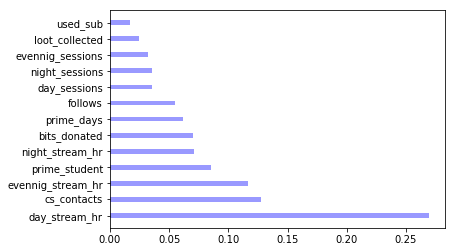

In [256]:
df_f = pd.DataFrame(clf.feature_importances_, columns=["score"])
df_f["feature"] = features
df_f.sort_values("score", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.3
rects = plt.barh(index , df_f["score"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["feature"])
plt.show()